# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT

In this homework exercise you will apply the machine learning techniques we've covered so far:
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions.

In [134]:
MY_UNIQNAME = 'erap' # fill this in with your uniqname

## Task 1 (10 points): be thorough in EDA, explain in detail
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [135]:
# insert your code here.  You may use multiple cells if you wish.
import pandas as pd
import seaborn as sns
import numpy as np

In [136]:
marketing = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')

In [137]:
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [138]:
marketing.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [139]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Insert your explanations and interpretations here. You may use multiple cells if you wish.

In [140]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Numerical overview of the dataset across various features.

* There are 2240 entries in most columns, but Income has only 2216, indicating there are missing values that need to be addressed.
* The average Year_Birth is approximately 1968, indicating the average age of the dataset's individuals.
* High standard deviation in Income and MntWines implies a wide range of values and potential outliers
* Minimum values of 0 in spending categories (MntWines, MntFruits, etc.) and Kidhome, Teenhome indicate that there either customers have no purchases in this category or its also possible that they have no children/teens at home.
* 25% of the dataset has an income of less than 35,303.
* Median income is 51,381.5, lower than the mean, reinforcing the income disparity.
* 75% of the dataset has an income of less than 68,522
* Maximum values for Income and spending categories, especially MntWines, are significantly higher than the 75th percentile, confirming the presence of outliers

In [141]:
marketing['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [142]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* There are 24 missing values in the "Income" column, which indicates that data for income is not recorded. Income is the only column with missing values.

In [143]:
corr_matrix = marketing.corr()
corr_matrix

<ipython-input-143-679251761aab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = marketing.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


* We can observe that **MntMeatProducts** and **NumCatalogPurchases** are highly correlated (0.723827) and **MntWines** and **NumCatalogPurchases** are highly correlated as well (0.635226).

* we can also see that **Kidhome** and **Incomeand** inversely related (-0.428669), as are **NumWebVisitsMonth** and **Income** (-0.553088).

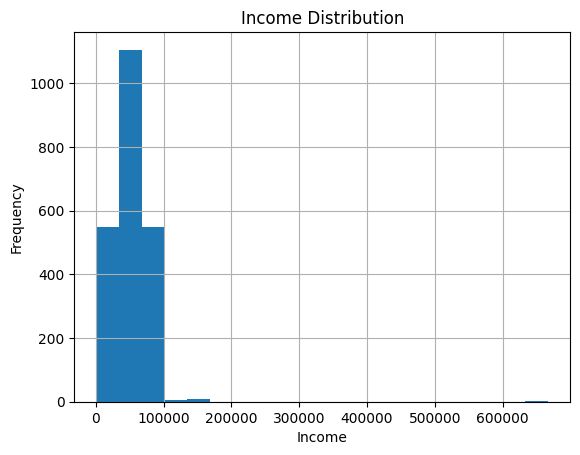

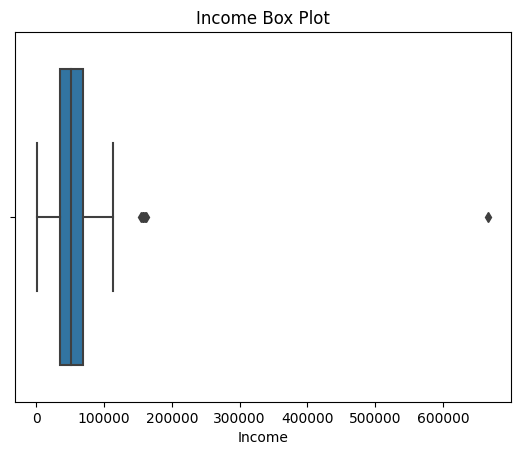

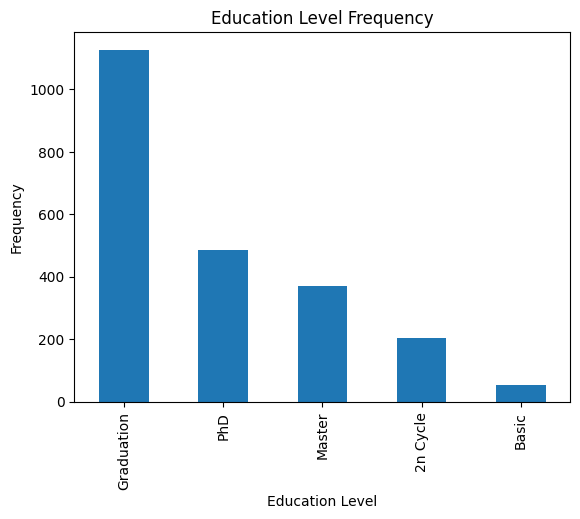

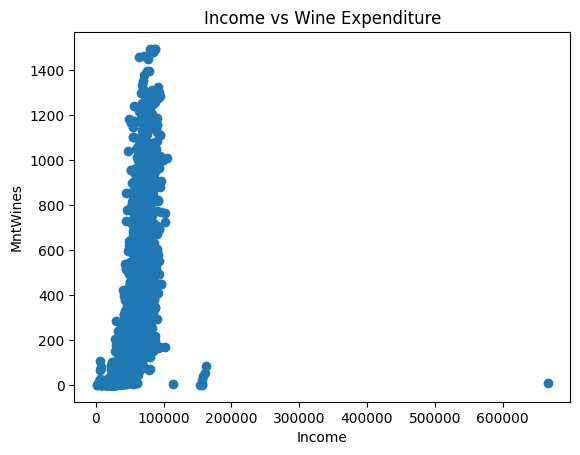

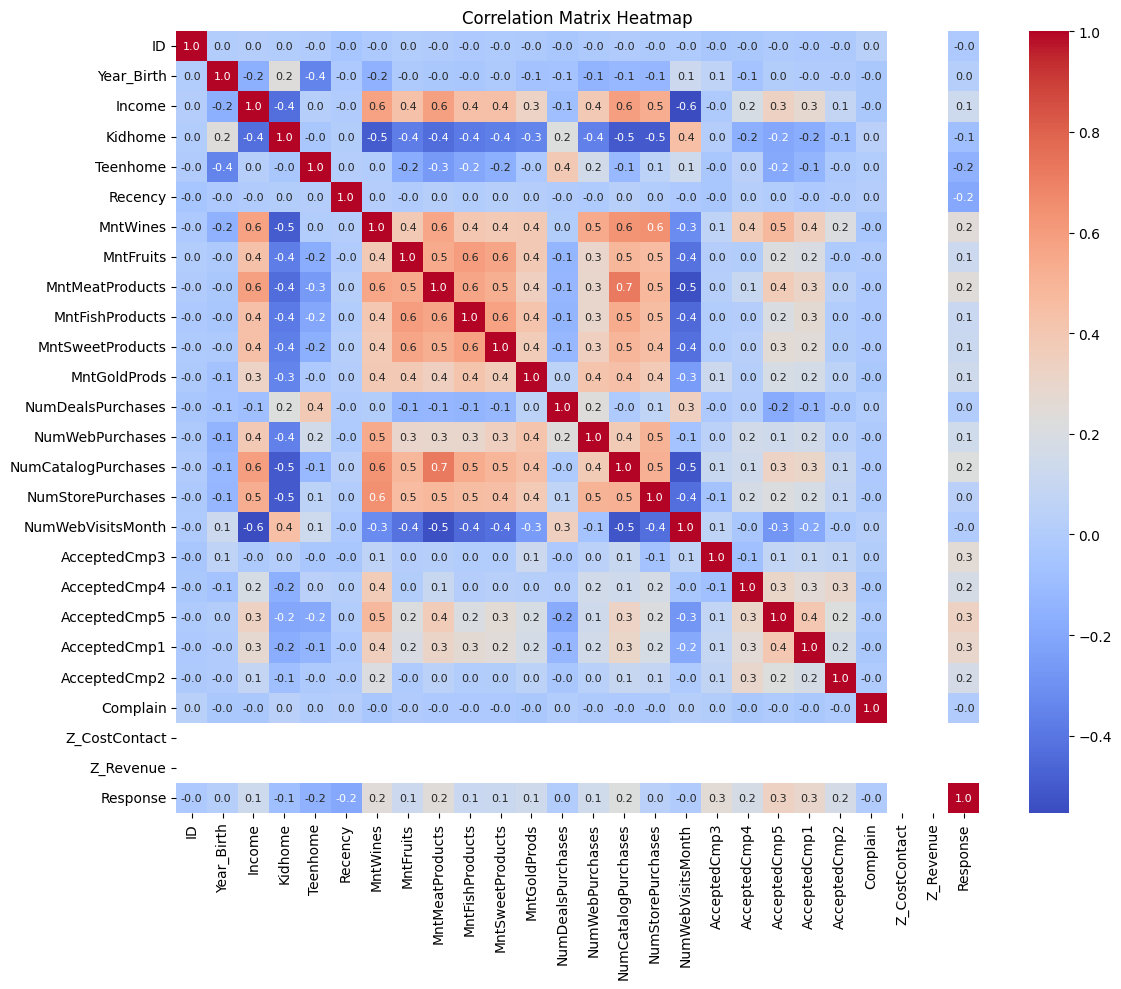

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


marketing['Income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Income', data=marketing)
plt.title('Income Box Plot')
plt.show()

marketing['Education'].value_counts().plot(kind='bar')
plt.title('Education Level Frequency')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

plt.scatter(marketing['Income'], marketing['MntWines'])
plt.title('Income vs Wine Expenditure')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal for consistency
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



Histogram:
* This plot provides a visual interpretation of the distribution of income across different ranges. It appears most incomes are concentrated in the lower range, with the highest frequency occurring in the first bin. There's a significant drop in frequency as income increases, which suggests that high incomes are much less common in this dataset.

Box plot:
* This plot suggests a similar story to the histogram: there are outliers on the higher end, and the median income is towards the lower end of the scale

## Task 2 (1 point): Drop all columns that have constant values.

In [145]:
# displaying all unique values for better intrepretation
unique_values = {column: marketing[column].unique() for column in marketing.columns}

unique_values

{'ID': array([5524, 2174, 4141, ..., 7270, 8235, 9405]),
 'Year_Birth': array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
        1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
        1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
        1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
        1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
        1941, 1944, 1995, 1940]),
 'Education': array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object),
 'Marital_Status': array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
        'Absurd', 'YOLO'], dtype=object),
 'Income': array([58138., 46344., 71613., ..., 56981., 69245., 52869.]),
 'Kidhome': array([0, 1, 2]),
 'Teenhome': array([0, 1, 2]),
 'Dt_Customer': array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
        '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
        '06-06-2013', '13-03

As we can see Z_CostContact and Z_Revenue are columns with constant values. We can go ahead and drop them. More global approach would be to make a function for the step.

In [146]:
def drop_constant_columns(dataframe):
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

marketing_ = drop_constant_columns(marketing)

In [147]:
marketing_.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [148]:
marketing_['In_Relationship'] = marketing_['Marital_Status'].apply(lambda status: 1 if status in ['Married', 'Together'] else 0)
marketing_.drop('Marital_Status', axis=1, inplace=True)

<ipython-input-148-c9e464a753a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_['In_Relationship'] = marketing_['Marital_Status'].apply(lambda status: 1 if status in ['Married', 'Together'] else 0)
<ipython-input-148-c9e464a753a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_.drop('Marital_Status', axis=1, inplace=True)


In [149]:
marketing_.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship
0,5524,1957,Graduation,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,1
3,6182,1984,Graduation,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,1


## Task 4 (3 points):
* Impute missing income values with the median income.
* Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [150]:
missing_values_before = marketing_['Income'].isnull().sum()

median_income = marketing_['Income'].median()

marketing_['Income'].fillna(median_income, inplace=True)
missing_values_after = marketing_['Income'].isnull().sum()

# adding the details below for better clarity, for imputed values
imputation_details = {
    'median_income': median_income,
    'values_imputed': missing_values_before,
    'missing_values_after_imputation': missing_values_after
}

imputation_details

<ipython-input-150-b7f888ec0b14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_['Income'].fillna(median_income, inplace=True)


{'median_income': 51381.5,
 'values_imputed': 24,
 'missing_values_after_imputation': 0}

The median is a robust measure of central tendency, which is not influenced by outliers and extreme values to the extent that the mean is. This makes the median a more reliable choice for imputation in datasets where the distribution of the values may be skewed.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features and the target
X = marketing_[['Income', 'In_Relationship']]
y = marketing_[['MntWines']]

# Split the data into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [152]:
rmse

263.61704688252837

An RMSE of 263.617 means that the model's predictions are, on average, off by this amount, given that there are actual values that go up to and above 1400. this is not a good rmse value.


in following graph we can visualize, how off the our model is given the values.

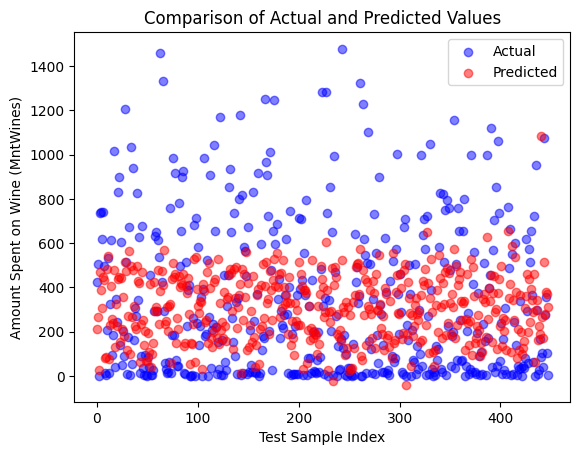

In [153]:
import matplotlib.pyplot as plt

# Plot actual test values
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')

# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Amount Spent on Wine (MntWines)')
plt.legend()
plt.show()

The plot suggests that while the model may be adequate for low to moderate spenders, it does not perform well for high spenders, which could be a significant limitation if the goal is to accurately predict spending for all customer segments.

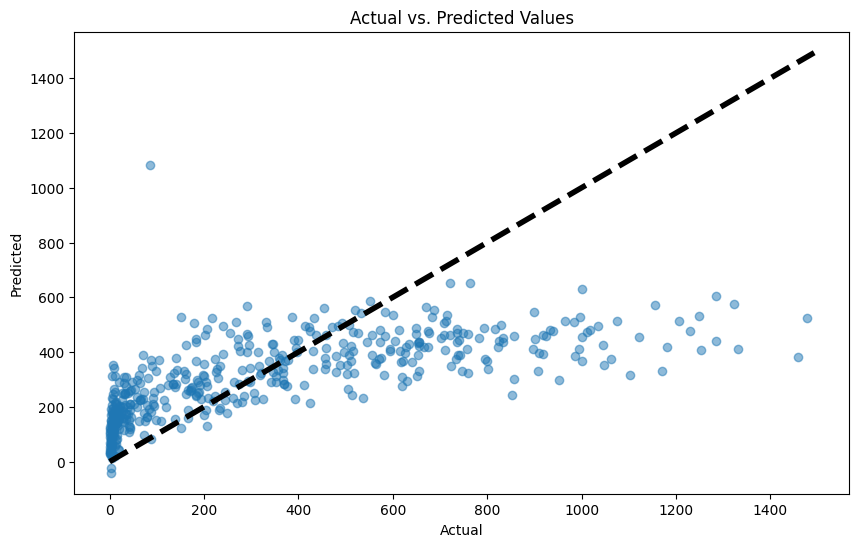

In [154]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')


plt.show()

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA). 1) Report the percentage of variance retained in the first 5 principal components.

2)Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

3)Repeat the above steps using 7 clusters. 4) Compare the results to the 4 cluster solution.  5)Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  6)Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [155]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from datetime import datetime

# Convert 'Dt_Customer' to a datetime object
marketing_['Dt_Customer'] = pd.to_datetime(marketing_['Dt_Customer'])

# Extract numerical features from the date
marketing_['Year'] = marketing_['Dt_Customer'].dt.year
marketing_['Month'] = marketing_['Dt_Customer'].dt.month
marketing_['Day'] = marketing_['Dt_Customer'].dt.day

# Now drop the original date column
marketing_.drop('Dt_Customer', axis=1, inplace=True)



<ipython-input-155-13fd2aa4fdae>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  marketing_['Dt_Customer'] = pd.to_datetime(marketing_['Dt_Customer'])
<ipython-input-155-13fd2aa4fdae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_['Dt_Customer'] = pd.to_datetime(marketing_['Dt_Customer'])
<ipython-input-155-13fd2aa4fdae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [156]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# One-hot encode categorical variables
categorical_features = ['Education']
marketing_encoded = pd.get_dummies(marketing_, columns=categorical_features)


In [157]:
marketing_encoded

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,In_Relationship,Year,Month,Day,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,1,0,2012,4,9,0,0,1,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,2014,8,3,0,0,1,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,1,2013,8,21,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,1,2014,10,2,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,1,2014,1,19,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,1,2013,6,13,0,0,1,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,1,2014,10,6,0,0,0,0,1
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,2014,1,25,0,0,1,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,0,1,2014,1,24,0,0,0,1,0


In [158]:
# Scale the data
scaler = StandardScaler()
marketing_scaled = scaler.fit_transform(marketing_encoded)

In [159]:
# Perform PCA to reduce the data to 5 dimensions
pca = PCA(n_components=5)
marketing_pca = pca.fit_transform(marketing_scaled)

# Cal the percentage of variance retained in the first 5 principal components
variance_retained = pca.explained_variance_ratio_.sum()


In [160]:
variance_retained

0.42354066739256674

In [161]:
# Conduct Agglomerative Clustering to find 4 clusters using average linkage
agg_cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='average')
clusters_4 = agg_cluster_4.fit_predict(marketing_pca)

In [162]:
clusters_4

array([0, 0, 0, ..., 0, 0, 0])

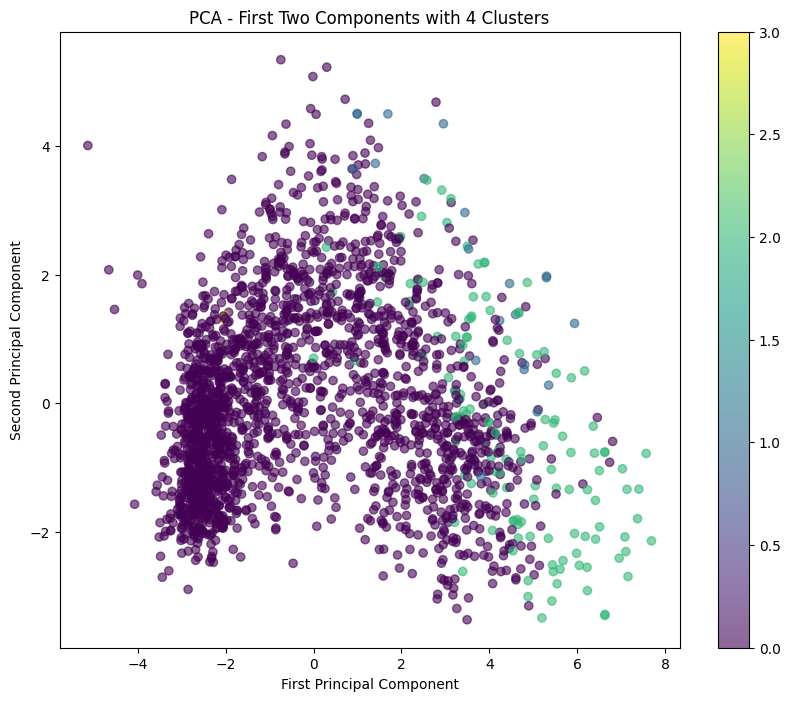

In [163]:
# Scatterplot of the first two principal components, colored by cluster membership
plt.figure(figsize=(10, 8))
plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_4, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components with 4 Clusters')
plt.colorbar()
plt.show()

* The clusters appear to have some degree of separation but with overlap, especially between what appears to be the green and purple clusters. The yellow and blue clusters seem to be more distinct with less overlap with the other clusters.
* the overlap suggests that the distinction between some customer segments is not entirely clear-cut in the reduced dimensionality space of the first two principal components.

In [164]:
# Repeat the above steps for 7 clusters
agg_cluster_7 = AgglomerativeClustering(n_clusters=7, linkage='average')
clusters_7 = agg_cluster_7.fit_predict(marketing_pca)

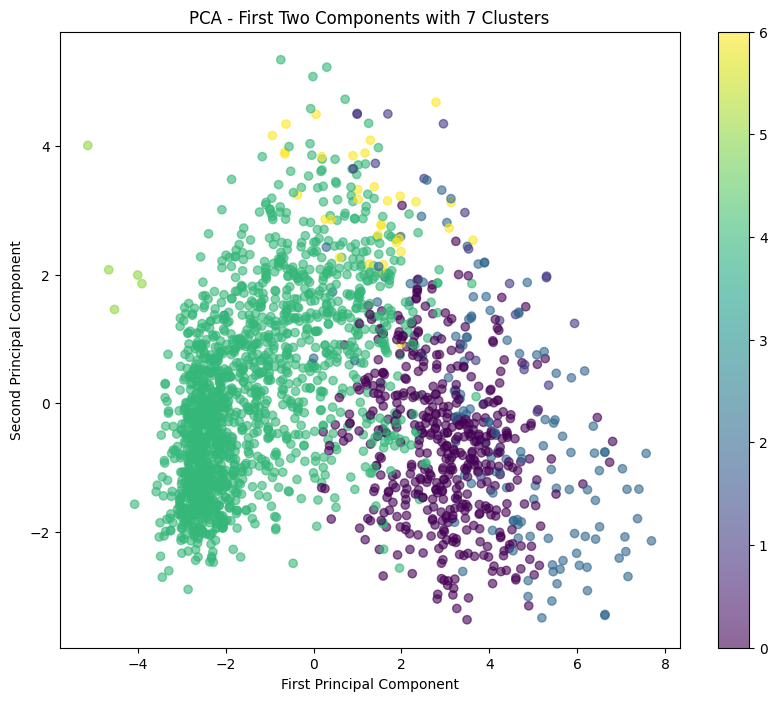

In [165]:
# Scatterplot for 7 clusters
plt.figure(figsize=(10, 8))
plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_7, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components with 7 Clusters')
plt.colorbar()
plt.show()


* the increase in clusters seems to introduce more overlap, particularly among the central clusters, suggesting that the additional clusters may not be as distinct from one another.

* Compared to the 4 cluster solution, the 7 cluster configuration might capture more specific patterns in the data but at the cost of clear separability between some of the clusters.

I would prefer to use 4 cluster solution, as it has less overlap

6)Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [166]:
# Compare results and define customer segments
marketing_['Cluster_4'] = clusters_4
marketing_['Cluster_7'] = clusters_7

# To define customer segments, we use groupby on the original dataset with the clusters included
cluster_characteristics_4 = marketing_.groupby('Cluster_4').mean()
cluster_characteristics_7 = marketing_.groupby('Cluster_7').mean()

<ipython-input-166-f0b29ac7e0f6>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics_4 = marketing_.groupby('Cluster_4').mean()
<ipython-input-166-f0b29ac7e0f6>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics_7 = marketing_.groupby('Cluster_7').mean()


In [167]:
cluster_characteristics_4

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship,Year,Month,Day,Cluster_7
Cluster_4,,,,,,,,,,,,,,,,,,,,,
0,5602.116435,1968.689027,50238.246047,0.473407,0.528031,49.363680,262.479157,24.330618,146.823191,34.988021,...,0.023479,0.026354,0.000000,0.009583,0.107810,0.645424,2013.030187,6.544801,15.524197,3.097748
1,5029.181818,1966.500000,72355.954545,0.000000,0.454545,54.227273,1017.818182,15.227273,231.227273,37.909091,...,0.681818,0.545455,0.954545,0.000000,0.727273,0.636364,2012.954545,5.909091,18.363636,1.000000
2,5513.658915,1971.302326,81255.693798,0.038760,0.155039,44.496124,857.007752,60.496124,484.162791,79.093023,...,0.767442,0.596899,0.054264,0.007752,0.720930,0.627907,2012.992248,6.263566,16.147287,2.000000
3,6458.500000,1955.000000,46015.000000,1.000000,1.000000,25.000000,38.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2014.000000,4.000000,13.000000,3.000000


In [168]:
cluster_characteristics_7

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship,Year,Month,Day,Cluster_4
Cluster_7,,,,,,,,,,,,,,,,,,,,,
0,5622.948875,1967.836401,73297.873211,0.044990,0.327198,50.474438,520.462168,70.034765,412.327198,99.364008,...,0.087935,0.081800,0.000000,0.008180,0.147239,0.607362,2012.936605,6.650307,14.952965,0.0
1,5029.181818,1966.500000,72355.954545,0.000000,0.454545,54.227273,1017.818182,15.227273,231.227273,37.909091,...,0.681818,0.545455,0.954545,0.000000,0.727273,0.636364,2012.954545,5.909091,18.363636,1.0
2,5513.658915,1971.302326,81255.693798,0.038760,0.155039,44.496124,857.007752,60.496124,484.162791,79.093023,...,0.767442,0.596899,0.054264,0.007752,0.720930,0.627907,2012.992248,6.263566,16.147287,2.0
3,6458.500000,1955.000000,46015.000000,1.000000,1.000000,25.000000,38.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2014.000000,4.000000,13.000000,3.0
4,5611.749198,1969.100064,42987.357922,0.610006,0.579217,49.023092,172.837716,10.080821,62.587556,14.843489,...,0.003849,0.009622,0.000000,0.010263,0.093008,0.658114,2013.076331,6.477870,15.672867,0.0
5,7548.800000,1966.400000,5252.800000,0.400000,0.600000,60.000000,42.800000,4.200000,17.600000,2.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,2013.200000,6.200000,16.800000,0.0
6,4574.529412,1962.441176,57676.602941,0.382353,1.058824,47.441176,694.705882,23.352941,209.705882,37.588235,...,0.000000,0.000000,0.000000,0.000000,0.235294,0.617647,2012.235294,8.147059,16.735294,0.0


* There's a notable difference in income across clusters
* The amount spent on wine (MntWines) varies considerably, suggesting that some clusters may represent high spenders on wines, while others might be low spenders.

Overall, The 4-cluster solution appears to provide a broader segmentation of customers, potentially more manageable for broad marketing strategies. The 7-cluster solution offers a finer segmentation, which could be useful for targeted marketing initiatives.


## Task 7 (20 points):
1)Conduct a k-means clustering of the data.  2)Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). 3)Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  4) Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

5) Compare the results to the agglomerative clustering you did in the previous task.  6) Which solution do you prefer and why?

we take the following steps:

* onduct k-means clustering:Perform k-means clustering on the dataset after preprocessing and dimensionality reduction.
* Preprocess the data:One-hot encode categorical variables.
Scale the numerical data.
Apply PCA to reduce the data to 5 dimensions.
* Determine the optimal number of clusters:Calculate the average silhouette score for a range of cluster numbers.
Choose the number of clusters that gives the highest silhouette score.
Create a silhouette plot for the optimal number of clusters.
* Define customer segments:Examine the characteristics of each cluster using statistical summaries.
* Compare with agglomerative clustering:Compare the k-means clustering results with the previous agglomerative clustering results based on silhouette scores and interpretability.
* State your preference:Decide which clustering method is preferable based on the criteria above.

In [169]:
marketing_

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,In_Relationship,Year,Month,Day,Cluster_4,Cluster_7
0,5524,1957,Graduation,58138.0,0,0,58,635,88,546,...,0,0,0,1,0,2012,4,9,0,0
1,2174,1954,Graduation,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,2014,8,3,0,4
2,4141,1965,Graduation,71613.0,0,0,26,426,49,127,...,0,0,0,0,1,2013,8,21,0,0
3,6182,1984,Graduation,26646.0,1,0,26,11,4,20,...,0,0,0,0,1,2014,10,2,0,4
4,5324,1981,PhD,58293.0,1,0,94,173,43,118,...,0,0,0,0,1,2014,1,19,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,0,1,46,709,43,182,...,0,0,0,0,1,2013,6,13,0,0
2236,4001,1946,PhD,64014.0,2,1,56,406,0,30,...,1,0,0,0,1,2014,10,6,0,4
2237,7270,1981,Graduation,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,2014,1,25,0,4
2238,8235,1956,Master,69245.0,0,1,8,428,30,214,...,0,0,0,0,1,2014,1,24,0,4


In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Select only the necessary columns (excluding ID, Cluster_4, and Cluster_7 columns)
columns_to_include = [col for col in marketing_.columns if col not in ['ID', 'Cluster_4', 'Cluster_7']]
marketing_ = marketing_[columns_to_include]

# Identify categorical columns (excluding 'Education' if it's already one-hot encoded)
categorical_cols = marketing_.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(marketing_[categorical_cols])

# Create a DataFrame with the encoded variables
encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the encoded variables
marketing_.drop(categorical_cols, axis=1, inplace=True)
df = pd.concat([marketing_, encoded], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(marketing_)

# Apply PCA to reduce the data to 5 dimensions
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-170-3c1bcf1f0ab1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_.drop(categorical_cols, axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is: 0.37173359104435955
For n_clusters = 3, the average silhouette_score is: 0.3086495613518767


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is: 0.3143967604116736
For n_clusters = 5, the average silhouette_score is: 0.23384539279254557


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is: 0.2047721094032666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is: 0.21035639352176932


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is: 0.21808846708847984


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is: 0.21730905870470388


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is: 0.2222079577081959


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the average silhouette_score is: 0.2149964724555895


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the average silhouette_score is: 0.20440119168057355


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the average silhouette_score is: 0.20188562310505687


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14, the average silhouette_score is: 0.20442041216926923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15, the average silhouette_score is: 0.20642824171957083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16, the average silhouette_score is: 0.20674940494364752
Best number of clusters by silhouette score: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


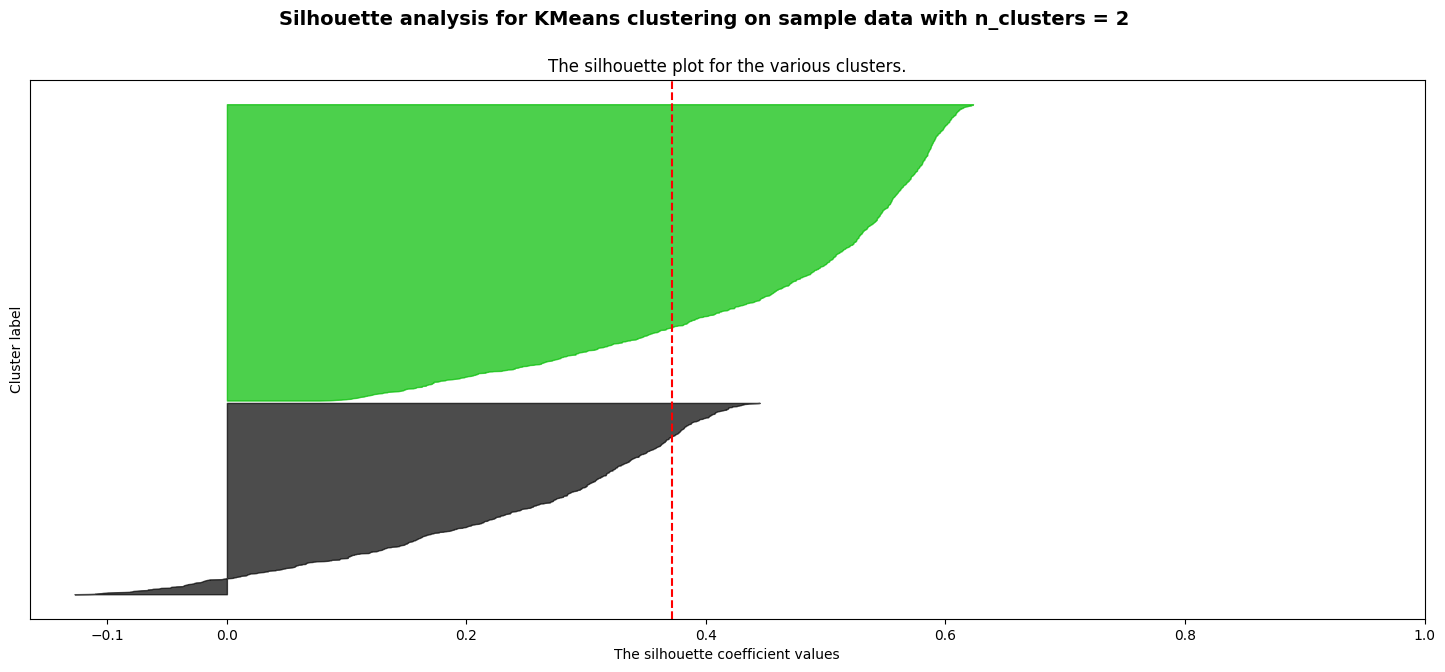

In [171]:
# Determine the optimal number of clusters using silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
best_n_clusters = 0
best_silhouette_score = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # Store the best score and corresponding number of clusters
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"Best number of clusters by silhouette score: {best_n_clusters}")

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

y_lower = 10
for i in range(best_n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / best_n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=best_silhouette_score, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {best_n_clusters}", fontsize=14, fontweight='bold')
plt.show()


* Most of the silhouette coefficients for both clusters are above average, as indicated by the area filled in color. This suggests that most data points are well matched to their own cluster and poorly matched to neighboring clusters.
* The silhouette score for the green cluster has a wider range of values and includes scores that are closer to +1, which may indicate that the green cluster is more cohesive.
* The silhouette score for the black cluster is generally lower, indicating that data points in this cluster are, on average, closer to neighboring clusters.
* The red dashed line marks the average silhouette score across all samples. The average score seems to be around 0.4, which is a reasonable score but not particularly high, suggesting moderate separation between the clusters.
* The presence of samples with a low silhouette score (close to 0) in the black cluster could be due to cluster overlap

Combined Interpretation:

* The PCA visualizations suggest that a higher number of clusters may capture more nuanced differences between customer segments, as seen with the 7-cluster solution.
* However, the silhouette analysis for two clusters indicates there may be one large, well-separated group and another less cohesive group.
* The choice between 4 or 7 clusters would depend question we are trying to answer. If distinct customer segments are required for targeted marketing, more clusters might be beneficial. If the goal is to understand broader trends in the customer base, fewer clusters may suffice.
* The silhouette analysis for two clusters seems to suggest that a two-cluster solution does not provide the best separation since one cluster has a wide range of silhouette scores.
Overall, the best clustering solution would balance the clear separation of clusters (as seen in the silhouette plot) with the business need for actionable segments (as suggested by the PCA visualizations).

## Task 8 (10 points):
1) Show the results of a t-SNE analysis of the dataset.  2)Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  3)Can you define customer segments by examining the characteristics of each cluster?  4)How might you label the points in the t-SNE plot to show characteristics of each cluster?

<ipython-input-172-e78319eacb55>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_['kmeans_cluster'] = kmeans.labels_
<ipython-input-172-e78319eacb55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-172-e78319eacb55>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

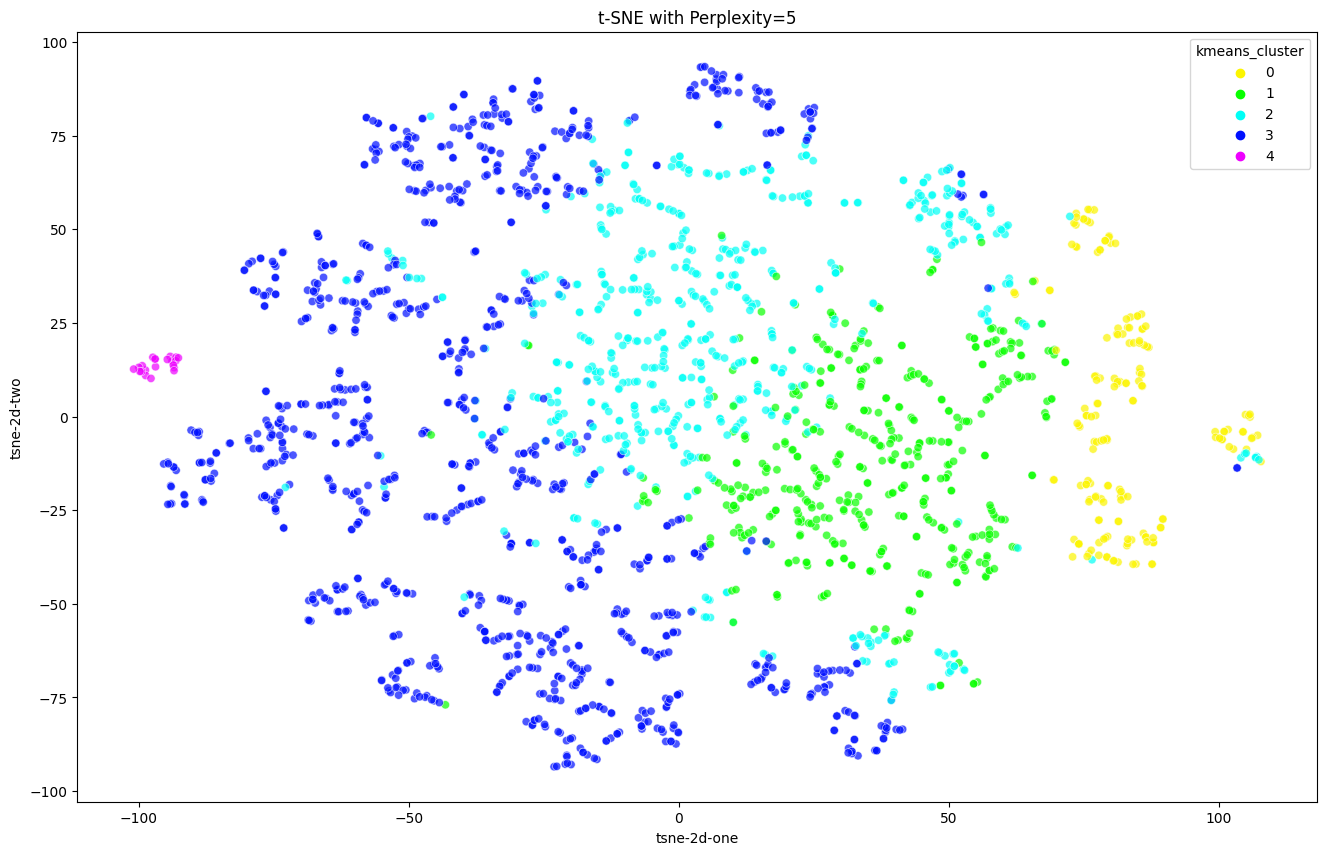

<ipython-input-172-e78319eacb55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-172-e78319eacb55>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-two'] = tsne_results[:,1]


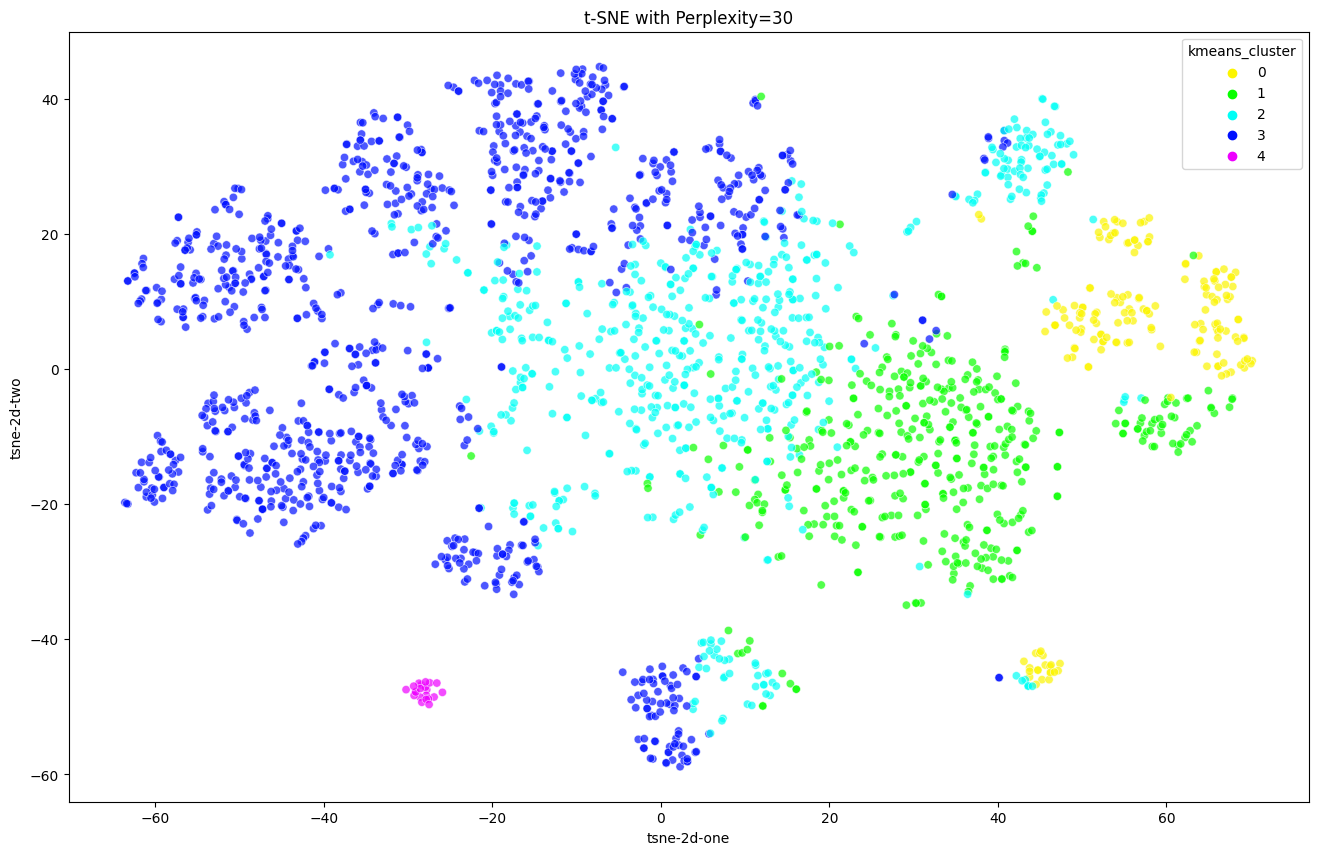

<ipython-input-172-e78319eacb55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-172-e78319eacb55>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-two'] = tsne_results[:,1]


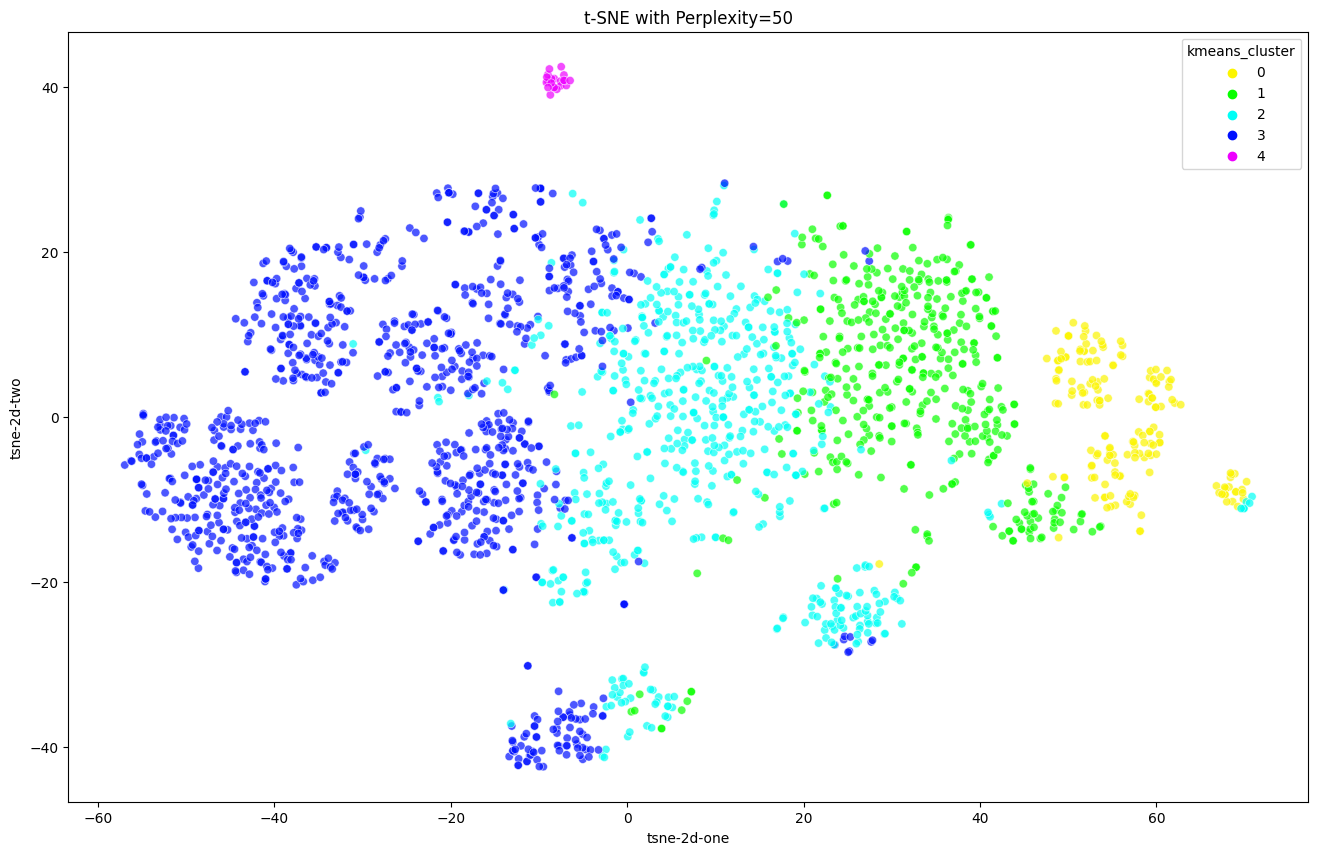

<ipython-input-172-e78319eacb55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-172-e78319eacb55>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tsne-2d-two'] = tsne_results[:,1]


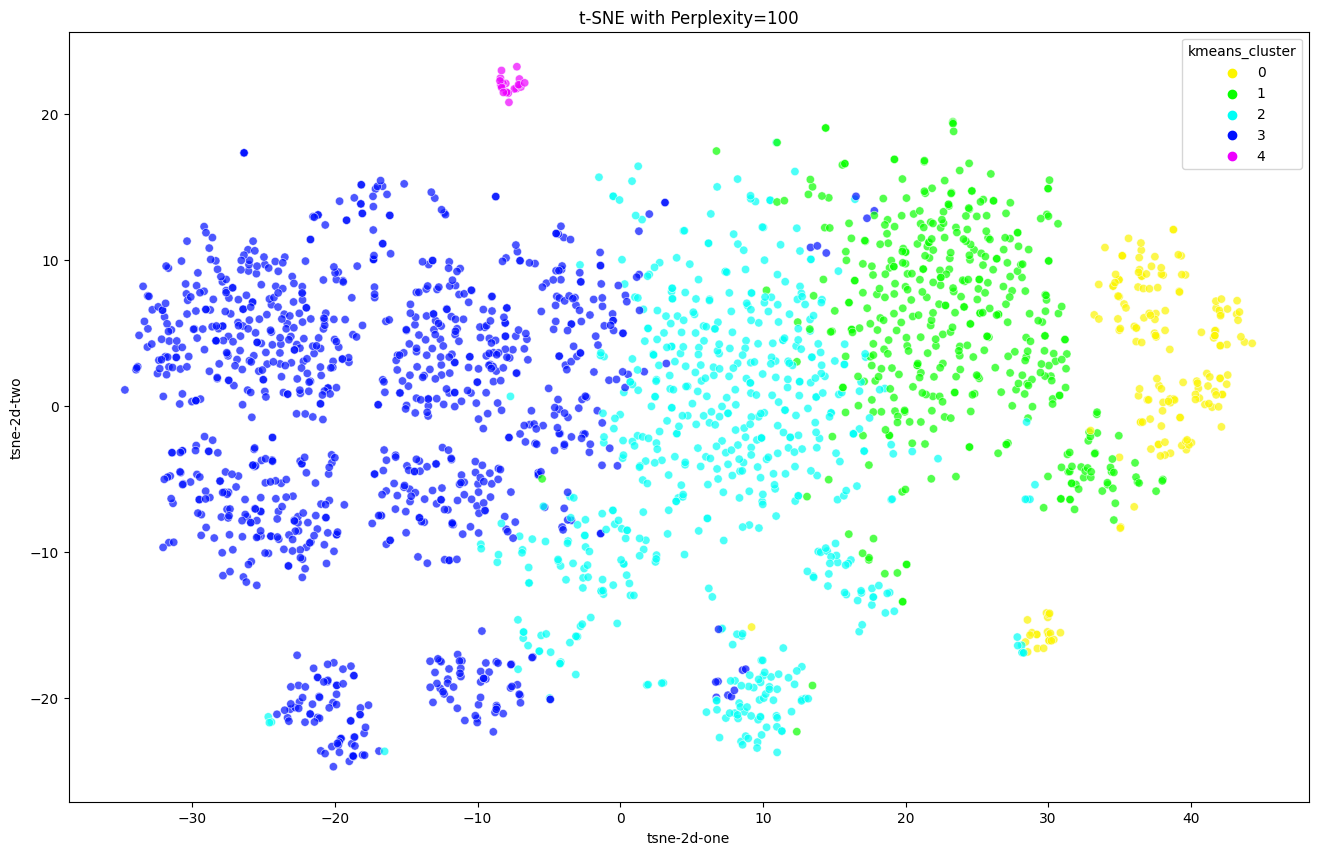

In [172]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'scaled_data' is your preprocessed data ready for t-SNE
# Perform k-means clustering to get the labels
# Explicitly set n_init to avoid the FutureWarning
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(scaled_data)
marketing_['kmeans_cluster'] = kmeans.labels_

# Now you can perform t-SNE and plot the results
def tsne_analysis(data, perplexities, df):
    for perp in perplexities:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
        tsne_results = tsne.fit_transform(data)

        df['tsne-2d-one'] = tsne_results[:,0]
        df['tsne-2d-two'] = tsne_results[:,1]

        plt.figure(figsize=(16,10))
        sns.scatterplot(
            x='tsne-2d-one', y='tsne-2d-two',
            hue='kmeans_cluster',
            palette=sns.color_palette('hsv', n_colors=len(df['kmeans_cluster'].unique())),
            data=df,
            legend='full',
            alpha=0.7
        )
        plt.title(f't-SNE with Perplexity={perp}')
        plt.show()

# Define a range of perplexity values to test
perplexity_values = [5, 30, 50, 100]

# Perform t-SNE analysis with the defined perplexity values
tsne_analysis(scaled_data, perplexity_values, marketing_)




INTERPRETATION
* Cluster Formation: As perplexity increases, the clusters become more cohesive and separable. This indicates that higher perplexity values may provide a clearer distinction between different customer segments.

* Perplexity Impact: At a low perplexity of 5, clusters are less distinguishable and appear more intermixed. This suggests that local relationships dominate. As perplexity increases, we see a balance between preserving local and global aspects, leading to better cluster formation and separation.

* Isolated Cluster: Across all perplexity levels, there is consistently a small, distinct cluster (purple points) that separates well from the others. This could represent a specific niche segment within the customer base.

* Optimal Perplexity: The perplexity value of 50 offers a balance between separation and grouping, with clusters appearing well-formed but not too dispersed. This level may provide the best compromise for identifying meaningful customer segments.

In [173]:
# Define customer segments based on k-means clusters
customer_segments = marketing_.groupby('kmeans_cluster').mean()
print(customer_segments)

                 Year_Birth        Income   Kidhome  Teenhome    Recency  \
kmeans_cluster                                                             
0               1969.205882  81559.558824  0.052941  0.129412  49.794118   
1               1967.925000  74171.245455  0.047727  0.215909  49.218182   
2               1964.359932  57310.200340  0.241087  0.945671  48.385399   
3               1971.762745  35104.701961  0.793137  0.440196  49.285294   
4               1965.095238  45242.285714  0.666667  0.523810  53.047619   

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
kmeans_cluster                                                            
0               876.694118  56.600000       468.417647        77.282353   
1               489.277273  72.097727       433.700000       106.086364   
2               459.879457  20.276740       131.241087        27.808149   
3                41.252941   5.020588        23.378431         7.177451   
4               1

Insert your explanations and interpretations here.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.